In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/microbes-dataset/microbes.csv


#### This note book is still progress. Always view the latest version.

# Objective: To identify Ulothrix from other microorganisms

# Section 1: EDA

> **This section prepares the data and checks some of its properties such as datatypes of each feature and its cardinality. Also, this section checks the correlation of each feature to the target and checks if the target is balance.**

# Importing Libraries needed

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

The initial libraries imported are splitted into groups. The first group is for loading and manipulating data, second group is for visualization, third is for dealing with categorical features, and the last is for ignoring warnings.

# Dataset

In [3]:
data = pd.read_csv('../input/microbes-dataset/microbes.csv')
print(f'Dataset shape: {data.shape}')
print()
print('Dataset head:')
data.head()

Dataset shape: (30527, 26)

Dataset head:


,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,10.90,1.75,2.97,3.12,3.12,2.97,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,19.20,1.77,3.95,6.08,6.08,5.49,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,10.20,1.51,3.49,5.95,5.95,5.99,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,10.70,3.34,3.63,8.93,8.93,8.90,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,1.22,8.40,17.10,10.20,10.20,10.20,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


Dataset currently has 26 features but there is one that is not needed which is the `Unnamed: 0`. So dataset actually has 25 columns. Remove `Unnamed: 0`.

In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)

*Feature Descriptions:*

1. Solidity - It is the ratio of area of an object to the area of a convex hull of the object. Computed as Area/ConvexArea.
2. Eccentricity - The eccentricity is the ratio of length of major to minor axis of an object.
3. EquivDiameter - Diameter of a circle with the same area as the region.
4. Extrema - Extrema points in the region. The format of the vector is: top-left top-right right-top right-bottom bottom-right
5. FilledArea - Number of on pixels in FilledImage, returned as a scalar.
6. Extent - Ratio of the pixel area of a region with respect to the bounding box area of an object.
7. Orientation - The overall direction of the shape. The value ranges from -90 degrees to 90 degrees.
8. EulerNumber - Number of objects in the region minus the number of holes in those objects.
9. BoundingBox1 - Position and size of the smallest box (rectangle) which bounds the object.
10. BoundingBox2 - *no information for now*
11. BoundingBox3 - *no information for now*
12. BoundingBox4 - *no information for now*
13. ConvexHull1 - From ScienceDirect - 'In a Euclidean plane, given a finite set of points Q, it is sometimes interesting to determine its convex hull, namely the minimum convex polygon so that any point of Q is either inside this polygon or at its border.' It is important for shape analysis
14. ConvexHull2 - *no information for now*
15. ConvexHull3 - *no information for now*
16. ConvexHull4 - *no information for now*
17. MajorAxisLength - *no information for now*
18. MinorAxisLength - *no information for now*
19. Perimeter - *no information for now*
20. ConvexArea - *no information for now*
21. Centroid1 - *no information for now*
22. Centroid2 - *no information for now*
23. Area - *no information for now*
24. raddi - *no information for now*
25. microorganisms - *no information for now*

# Missing Values

In [5]:
print('NUMBER OF MISSING VALUES FOR EACH FEATURE:')
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

NUMBER OF MISSING VALUES FOR EACH FEATURE:


,count_missing,perc_missing
Solidity,0,0.0
ConvexHull2,0,0.0
raddi,0,0.0
Area,0,0.0
Centroid2,0,0.0
Centroid1,0,0.0
ConvexArea,0,0.0
Perimeter,0,0.0
MinorAxisLength,0,0.0
MajorAxisLength,0,0.0


No missing values for this dataset

# Duplicates

In [6]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)*100}%')

Duplicates in the dataset: 25653
Percentage of duplicates: 84.03380613882793%


There are so many duplicates, they need to be removed. I also expect that the shape of the dataset will be greatly reduced.

In [7]:
data = data.drop_duplicates()
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)}%')
print(f'Dataset shape: {data.shape}')

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%
Dataset shape: (4874, 25)


# Cardinality

In [8]:
data.nunique()

Solidity            883
Eccentricity        247
EquivDiameter       953
Extrema             750
FilledArea         1601
Extent             1001
Orientation        1075
EulerNumber          81
BoundingBox1        781
BoundingBox2        637
BoundingBox3        518
BoundingBox4        505
ConvexHull1         775
ConvexHull2         775
ConvexHull3         793
ConvexHull4         860
MajorAxisLength    1298
MinorAxisLength    1286
Perimeter          1414
ConvexArea         1796
Centroid1           976
Centroid2           958
Area               1525
raddi               410
microorganisms       10
dtype: int64

Almost all features are continuous except for the microorganism which is categorical because it has 10 values. And upon checking from the head, the microorganisms has a dtype of object.

# Data Types

In [9]:
data.dtypes

Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

The microorgranisms feature really has an object dtype. The others have continuous values.

# Target Distribution

Text(0.5, 1.0, 'Target distribution')

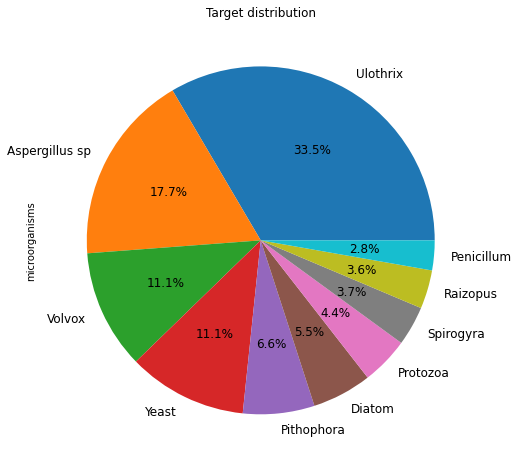

In [10]:
# Figure size
plt.figure(figsize=(8,8))

# Pie plot
data['microorganisms'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution")

In [11]:
data['microorganisms'].value_counts()

Ulothrix          1631
Aspergillus sp     864
Volvox             540
Yeast              540
Pithophora         324
Diatom             270
Protozoa           216
Spirogyra          179
Raizopus           175
Penicillum         135
Name: microorganisms, dtype: int64

The targets are not evenly distributed. The strategy that I will be using to this unbalanced dataset is undersampling and oversampling.

Since my target is to identify if a microorganism is Ulothrix or not, my strategy is to get a sample from other microorganisms equal to the number of the lowest one which is Spirogyra. So what will happen is I will get 135 samples from other microorganism except Ulothrix, then combine all of them. That part of the dataset is the 'Not Ulothrix' part and will contain 135x9=1215 rows. The 'Ulothrix' part contains 1631 rows so the 'Not Ulothrix' part will be oversampled to balanced the number of rows.

Applying undersampling

In [12]:
def not_ulothrix_undersampling(microCount, k=135):
  if len(microCount) < k:
    return microCount
  return microCount.sample(k)

Dataframe of Not Ulothrix

In [13]:
data_not_ulothrix = data.loc[data['microorganisms'] != 'Ulothrix']
data_not_ulothrix = data_not_ulothrix.groupby('microorganisms').apply(not_ulothrix_undersampling).reset_index(drop=True)
data_not_ulothrix ['microorganisms'].value_counts()

Aspergillus sp    135
Diatom            135
Penicillum        135
Pithophora        135
Protozoa          135
Raizopus          135
Spirogyra         135
Volvox            135
Yeast             135
Name: microorganisms, dtype: int64

Dataframe of Ulothrix

In [14]:
data_ulothrix = data.loc[data['microorganisms'] == 'Ulothrix']
data_ulothrix['microorganisms'].value_counts()

Ulothrix    1631
Name: microorganisms, dtype: int64

Combining both Dataframes and encoding Not Ulothrix

In [15]:
data = pd.concat([data_not_ulothrix, data_ulothrix], axis=0).reset_index(drop=True)
data.loc[data['microorganisms'] != 'Ulothrix', 'microorganisms'] = 'Not Ulothrix'
data['microorganisms'].value_counts()

Ulothrix        1631
Not Ulothrix    1215
Name: microorganisms, dtype: int64

Applying Oversampling

In [16]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
y = data.microorganisms
X = data.drop(['microorganisms'], axis=1)
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
X_over['microorganisms'] = y_over
data = X_over
data.shape

(3262, 25)

Plotting Target Distribution again

Text(0.5, 1.0, 'Target distribution')

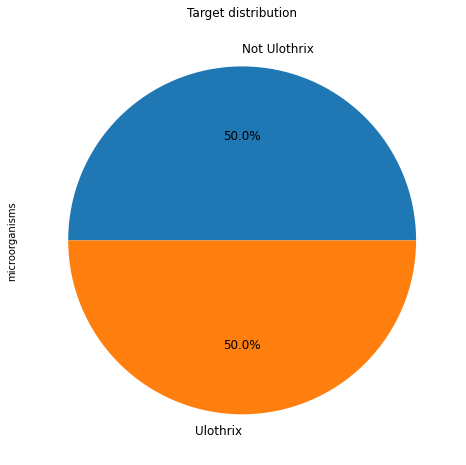

In [17]:
# Figure size
plt.figure(figsize=(8,8))

# Pie plot
data['microorganisms'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution")

Now that the dataset is reduced, the shape should be smaller.

In [18]:
print(f'Dataset shape: {data.shape}')
print()
print('Dataset head:')
data.head()

Dataset shape: (3262, 25)

Dataset head:


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,6.06,13.2,7.42,10.20,1.0500,3.85,5.05,21.7,8.43,2.96,4.060,5.010,9.48,9.48,9.10,8.46,2.330,3.150,2.650,0.63100,10.10,4.95,2.4200,10.30,Not Ulothrix
1,8.43,22.5,2.25,3.16,0.0918,3.13,16.10,22.9,1.77,12.50,1.680,1.400,2.07,2.07,1.77,1.78,1.170,0.393,0.414,0.04390,2.32,13.00,0.2330,3.50,Not Ulothrix
2,9.85,22.6,4.58,10.20,0.3660,4.32,14.30,22.6,7.95,8.99,3.420,2.030,8.06,8.06,8.01,8.00,2.070,0.637,1.080,0.15100,9.38,9.81,0.9340,4.30,Not Ulothrix
3,11.00,20.3,1.19,20.80,0.0263,6.84,4.91,23.0,20.90,17.90,0.446,0.691,20.70,20.70,20.90,20.90,0.353,0.266,0.159,0.00985,20.90,18.00,0.0677,1.65,Not Ulothrix
4,16.60,15.6,3.36,20.00,0.2160,12.00,2.03,22.6,19.90,10.00,0.906,1.500,19.90,19.90,19.90,19.90,0.625,0.760,0.277,0.04900,20.10,10.60,0.5070,4.18,Not Ulothrix


# Correlations

Encoding microorganisms feature first so that it can easily be included in correlation maps. 0 will be the value for 'Not Ulothrix' and 1 is for 'Ulothrix'

In [19]:
encoder = LabelEncoder()
data['microorganisms'] = encoder.fit_transform(data['microorganisms'])

Variable for features to remove.

In [20]:
to_remove = []

# Bounding Box

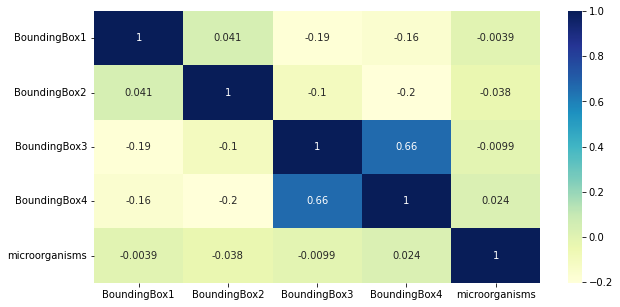

In [21]:
plt.figure(figsize=(10, 5))
sns.heatmap(data[['BoundingBox1','BoundingBox2','BoundingBox3','BoundingBox4', 'microorganisms']].corr(), annot=True, cmap="YlGnBu")
plt.show()

Bounding Box does not have much correlation to microorganisms. Consider removing these features.

In [22]:
for bb in ['BoundingBox1','BoundingBox2','BoundingBox3','BoundingBox4']:
  to_remove.append(bb)

# Convex Hull

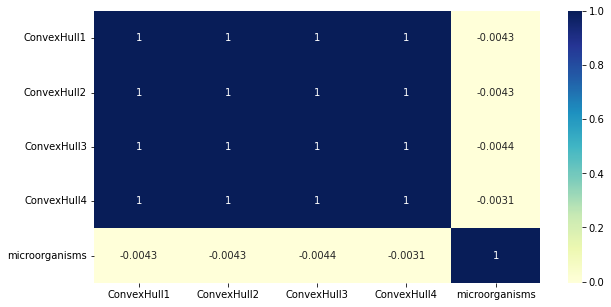

In [23]:
plt.figure(figsize=(10, 5))
sns.heatmap(data[['ConvexHull1','ConvexHull2','ConvexHull3','ConvexHull4', 'microorganisms']].corr(), annot=True, cmap="YlGnBu")
plt.show()

Convex Hull does not have much correlation to microorganisms. Consider removing these features.

In [24]:
for ch in ['ConvexHull1','ConvexHull2','ConvexHull3','ConvexHull4']:
  to_remove.append(ch)

# Others

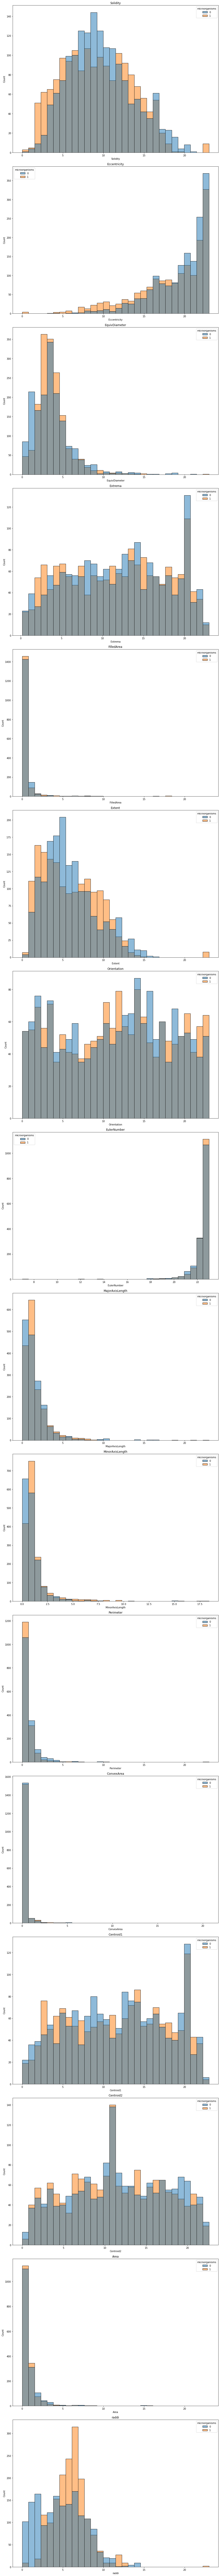

In [25]:
feats=list(data.drop(['BoundingBox1','BoundingBox2','BoundingBox3','BoundingBox4','ConvexHull1','ConvexHull2','ConvexHull3','ConvexHull4','microorganisms'], axis=1).columns)

# Plot features
fig=plt.figure(figsize=(25,150))
for i, var_name in enumerate(feats):
    ax=fig.add_subplot(len(feats),2,2*i+1)
    sns.histplot(data=data, x=var_name, axes=ax, bins=30, kde=False, hue='microorganisms')
    ax.set_title(var_name)

fig.tight_layout()  # Improves appearance a bit
plt.show()

The following features does not show clear distinctions between Ulothrix and Not Ulothrix.

- Extrema
- FilledArea
- Orientation
- EulerNumber
- MajorAxisLength
- MinorAxisLength
- Perimeter
- ConvexArea
- Centroid1
- Centroid2
- Area

Consider removing these features

In [26]:
for others in ['Extrema', 'FilledArea', 'Orientation', 'EulerNumber', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area']:
  to_remove.append(others)

# Exporting the new dataset

In [27]:
to_export = data.drop(to_remove, axis=1) #removal of features
to_export.to_csv('new_microbes.csv', index=False) # exporting

# Section 2: Modeling

> **This section covers the creation of models and hyperparameter tuning.**

# Importing new dataset

In [28]:
new_data = pd.read_csv('new_microbes.csv')
new_data.head()

,Solidity,Eccentricity,EquivDiameter,Extent,raddi,microorganisms
0,6.06,13.2,7.42,3.85,10.30,0
1,8.43,22.5,2.25,3.13,3.50,0
2,9.85,22.6,4.58,4.32,4.30,0
3,11.00,20.3,1.19,6.84,1.65,0
4,16.60,15.6,3.36,12.00,4.18,0


# Importing Libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

The task is have an accuracy of at least 80% by constructing an ensemble model using 2 base classifiers and 1 stacked model.

# Splitting the dataset

In [30]:
target = 'microorganisms'
y = new_data[target]
X = new_data.drop([target], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# RandomForestClassifier

**Hyperparameter Tuning for RandomForestClassifier**

In [31]:
rf_params = {'criterion': ['entropy'],
             'max_depth': (250, 500, 750, 1000),
             'n_estimators': (250, 500, 750, 1000),
             'max_features': ['sqrt']
}

rf_base = RandomForestClassifier(**rf_params)
rf_cv = RandomizedSearchCV(rf_base, rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

print("Tuned Decision RFParameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned Decision RFParameters: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 250, 'criterion': 'entropy'}
Best score is 0.8173764906303237


**Random Forest Classifier modeling**

In [32]:
rf_params = {'criterion': 'entropy',
             'max_depth': 500,
             'n_estimators': 750,
             'max_features': 'sqrt'
}
rf = RandomForestClassifier(**rf_params) # Define classifier
rf.fit(X_train, y_train) # Train model
print('Model performance:')
print(rf.score(X_test, y_test))

Model performance:
0.7828746177370031


# XGBoost

**Hyperparameter tuning for XGBoost**

In [33]:
xgb_params = {'objective': ['binary:logistic'],
              'max_depth': (1, 2),
              'learning_rate': (0.25, 0.5, 0.75, 0.8, 1),
              'n_estimators': (500, 1000)
}

xgb_base = XGBClassifier(**xgb_params)
xgb_cv = RandomizedSearchCV(xgb_base, xgb_params, cv = 5)
xgb_cv.fit(X_train, y_train)

print("Tuned Decision XGB Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Decision XGB Parameters: {'objective': 'binary:logistic', 'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.25}
Best score is 0.8773424190800683


**XGBoost modeling**

In [34]:
xgb_params = {'objective': 'binary:logistic',
              'max_depth': 2,
              'learning_rate': 0.8,
              'n_estimators': 1000
}

xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train) # Train model
print('Model performance:')
print(xgb.score(X_test, y_test))

Model performance:
0.8899082568807339


# Stacked Model

In [35]:
estimator_list = [
    ('rf',rf),
    ('xgb',xgb)
    ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

print('Model performance:')
print(stack_model.score(X_test, y_test))

Model performance:
0.8899082568807339


# Model Evaluation

I will use a confusion matrix. Confusion Matrix helps us to evaluate the performance of our classification model.

In [36]:
from sklearn import metrics
y_pred = stack_model.predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[155  27]
 [  9 136]]


<AxesSubplot:>

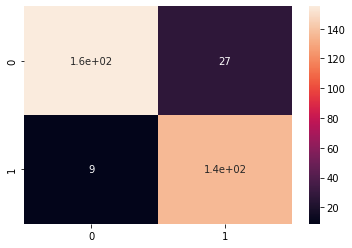

In [37]:
sns.heatmap(cf_matrix, annot=True)

# Export the Model

The code below is commented because it may not be important to others.

In [38]:
'''
import pickle
file_name = 'stacked_model.pkl'
pickle.dump(stack_model, open(file_name, 'wb'))
print("Stacked Model Saved as " + file_name)
'''

'\nimport pickle\nfile_name = \'stacked_model.pkl\'\npickle.dump(stack_model, open(file_name, \'wb\'))\nprint("Stacked Model Saved as " + file_name)\n'